In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Modulation et démodulation DSB-SC

## Modulation

In [81]:
a = -7 
b = 7

B = 5/(4*b) # fréquence maximale du signal à transmettre
print(B)

def x_inf(t):
    return np.cos(5*np.pi/2*t/b) 

def ind(t,a=a,b=b): # indicatrice entre a et b
    if t < a or t > b:
        return 0
    else :
        return 1
    
def x(t):
    return x_inf(t)*ind(t)

0.17857142857142858


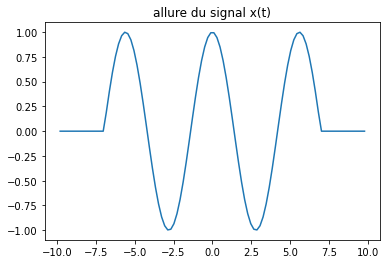

In [67]:
def afficher_signal(f,titre): #titre est une chaine de caractère
    e = (b-a)/5
    Lt = np.linspace(a-e,b+e,100) # Les signaux seront toujours centrés en 0
    plt.figure()
    plt.plot(Lt,np.vectorize(f)(Lt))
    plt.title(titre)

afficher_signal(x,"allure du signal x(t)")

Le signal est à bande limitée, donc non périodique.
<br/> On calcule sa transformée de Fourier puis on trace le spectre

In [68]:
def Fourier_transforme(f,omega):
    return quad(lambda t : f(t)*np.cos(omega*t),a,b)[0]

Fourier_transforme(x,0)

1.7825353626292273

In [72]:
inf = 5*10**2

def afficher_spectre(f, titre, inf=10**2):
    Lomega = np.linspace(-inf,inf,10*inf)
    plt.figure()
    vfourier_transforme = np.vectorize(Fourier_transforme,excluded={'f'})
    plt.scatter(Lomega,vfourier_transforme(f,Lomega)**2, marker=)
    plt.title(titre)
    plt.xlabel("$\omega$")
    plt.ylabel("Amplitude")

# Rq : on pourrait se contenter de faire une TFD puisque l'on fait une TF pour seulement l'évaluer en certain points

<ipython-input-68-71de7f0bd9bf>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda t : f(t)*np.cos(omega*t),a,b)[0]
<ipython-input-68-71de7f0bd9bf>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda t : f(t)*np.cos(omega*t),a,b)[0]


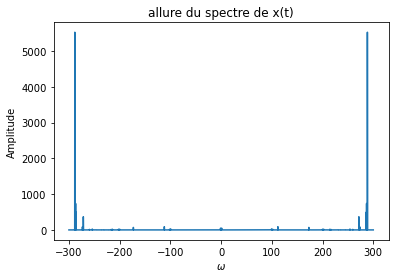

In [78]:
afficher_spectre(x, "allure du spectre de x(t)", 300)

<ipython-input-68-71de7f0bd9bf>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda t : f(t)*np.cos(omega*t),a,b)[0]
<ipython-input-68-71de7f0bd9bf>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda t : f(t)*np.cos(omega*t),a,b)[0]


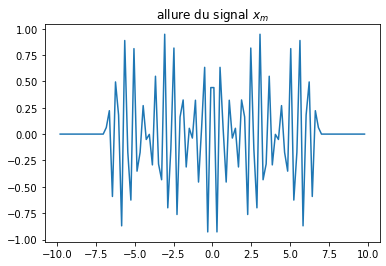

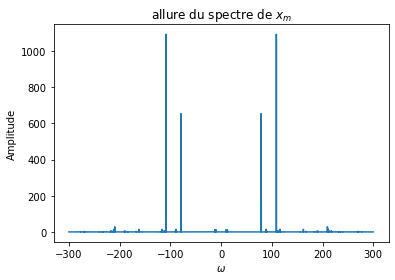

In [85]:
fc = 10*B # par exemple

def xm(t):
    return x(t)*np.cos(2*np.pi*fc*t)

afficher_signal(xm, "allure du signal $x_m$")
afficher_spectre(xm,"allure du spectre de $x_m$", inf=300)

## Démodulation synchrone "analogique"

<ipython-input-4-61232f404992>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda t : f(t)*np.cos(omega*t),-B,B)[0]
<ipython-input-4-61232f404992>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda t : f(t)*np.cos(omega*t),-B,B)[0]


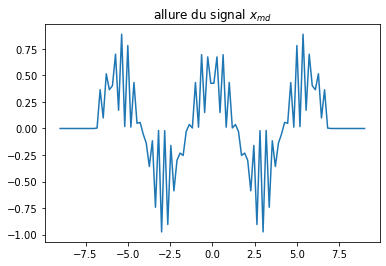

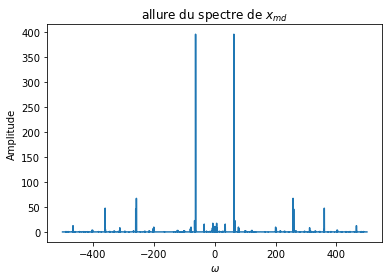

In [36]:
def xmd(t):
    return xm(t)*np.cos(2*np.pi*fc*t)

afficher_signal(xmd, "allure du signal $x_{md}$");
afficher_spectre(xmd,"allure du spectre de $x_{md}$", 500);

In [37]:
inf = 3*10**2
Lomega = np.linspace(-inf,inf,10*inf)

mask_passe_bas = (Lomega > -fc/5) & (Lomega < fc/5)

vfourier_transforme = np.vectorize(Fourier_transforme,excluded={'f'})

LFxmd = vfourier_transforme(xmd, Lomega)
LFxmd[~mask_passe_bas]=0


<ipython-input-4-61232f404992>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda t : f(t)*np.cos(omega*t),-B,B)[0]
<ipython-input-4-61232f404992>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda t : f(t)*np.cos(omega*t),-B,B)[0]


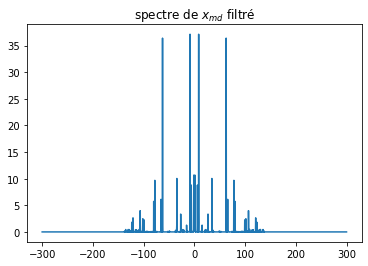

In [41]:
vfourier_transforme = np.vectorize(Fourier_transforme,excluded={'f'})
plt.figure()
plt.plot(Lomega,LFxmd**2)
plt.title("spectre de $x_{md}$ filtré")
plt.show()

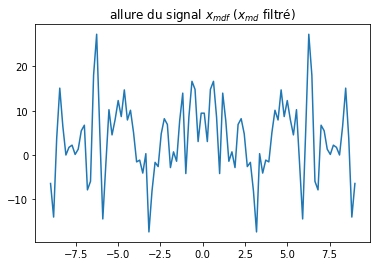

In [39]:
def xmdf(t):
    return 1/(2*np.pi)**0.5*np.sum(LFxmd*np.cos(Lomega*t))

afficher_signal(xmdf, "allure du signal $x_{mdf}$ ($x_{md}$ filtré)")

**Conclusion** : Le signal tend à s'homogéniser. Par ailleurs, l'amlitude augmente de manière importante du fait du filtrage. 

Le théorème de Shannon assure que l'on doit avoir $f_e \geq \frac{f_{max}}{2}$
<br/> Le fréquence minimale d'échantillonage possible est donc $f_{e,min} = \frac{f_{max}}{2}$

Sur le spectre précédent, la pulsation maximale est :

In [59]:
p = 0
while LFxmd[p]==0:
    p+=1

omega_max = -Lomega[p]

f_max = omega_max/(2*np.pi)
f_e = f_max/2
print("fréquence minimale d'échantillonage : ",f_e, 'Hz')

fréquence minimale d'échantillonage :  11.136600469434557 Hz


On a bien $f_{\infty} \gg f_c$

Le problème si on part de $x_m$ est que la largeur du spectre est infinie (voir le spectre). Il faudrait donc négliger les valeurs prisent à partir d'un certain rang. Alors le théorème de Shannon assurerait que la fréquence minimale d'échantillonage est la moitié de la fréquence maximale apparaissant dans le spectre.

## Démodulation synchrone par double échantillonage

À travers l'étude précédente, on néglige l'influence des composantes du spectre dès qu'elles sont < 

# À faire :
* Généraliser les fonctions à des spectres quelconques

In [84]:
quad(lambda t : t**3,0,1)[0]

0.25